#### Import libraries

In [97]:
import pandas as pd
import os

#### Merging yearly csv files into one file

In [98]:

files = [file for file in os.listdir("./Sales_Data")]

all_file_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_file_data = pd.concat([all_file_data,df])
    
all_file_data.to_csv("all_file_data.csv", index=False)

####  load in concatenated file containing all 12 files

In [99]:
df = pd.read_csv("all_file_data.csv")

#### Cleaning

#### Removing NaN values

In [100]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df = df.dropna(how='all')
df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Removing other strange values

In [101]:
df = df[df["Order Date"].str[0:2] != "Or"]
df = df.reset_index()


#### Convert Column types to integers

In [102]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])


#### Create Month column using Order Date column

In [103]:
df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype("int32")
df.head()


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### add a sales column, quantity ordered x price each

In [104]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### 1. What was the best month for sales? how much was earned?

In [105]:
results = df.groupby("Month").sum()
results

,index,Quantity Ordered,Price Each,Sales
Month,,,,
1,701983866,10903,1.811768e+06,1.822257e+06
2,736939638,13449,2.188885e+06,2.202022e+06
3,1709538042,17005,2.791208e+06,2.807100e+06
4,169872342,20558,3.367671e+06,3.390670e+06
5,2130476341,18667,3.135125e+06,3.152607e+06
6,1334894038,15253,2.562026e+06,2.577802e+06
7,1207430793,16072,2.632540e+06,2.647776e+06
8,292646206,13448,2.230345e+06,2.244468e+06
9,2101562504,13109,2.084992e+06,2.097560e+06


#### Display results in graph using matplotlib

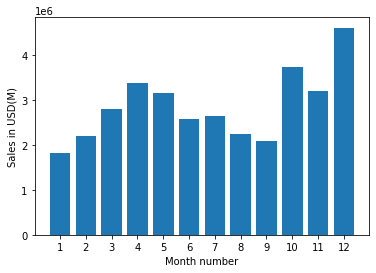

In [106]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD(M)")
plt.xlabel("Month number")
plt.show()


#### Add city column

In [107]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df["city"] = df["Purchase Address"].apply(lambda x: get_city(x) + " " + get_state(x))

df.head()



,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### 2. What city had the highest number of sales?

In [108]:
results = df.groupby("city").sum()
results

,index,Quantity Ordered,Price Each,Month,Sales
city,,,,,
Atlanta GA,1389170518,16602,2.779908e+06,104794,2.795499e+06
Austin TX,924331831,11153,1.809874e+06,69829,1.819582e+06
Boston MA,1873552039,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,1396143959,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,2768528105,33289,5.421435e+06,208325,5.452571e+06
New York City NY,2314885097,27932,4.635371e+06,175741,4.664317e+06
Portland ME,227138721,2750,4.471893e+05,17144,4.497583e+05
Portland OR,935485289,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,4164325906,50239,8.211462e+06,315520,8.262204e+06


#### display sales by city on graph

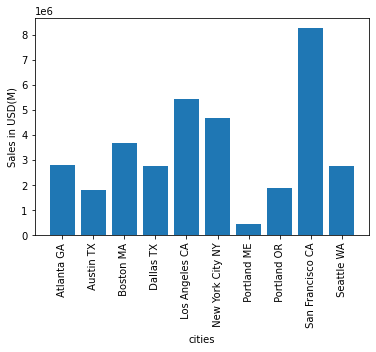

In [109]:
import matplotlib.pyplot as plt

cities = [city for city, df in df.groupby("city")]



plt.bar(cities,results["Sales"])
plt.xticks(cities, rotation="vertical")
plt.ylabel("Sales in USD(M)")
plt.xlabel("cities")
plt.show()


#### 3: What time of day should we display ads to maximize likelihood of customers buying product?

#### convert order date column into datetime format

In [110]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

#### Create hour and minute column using datetime

In [111]:
df["Hour"] = df["Order Date"].dt.hour
df["Minutes"] = df["Order Date"].dt.minute

df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minutes
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


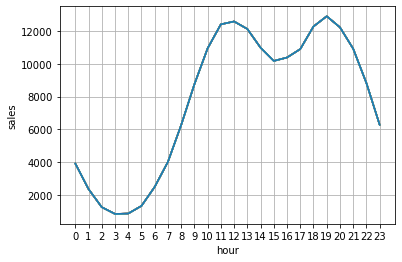

In [112]:
hours = [hour for hour, df in df.groupby("Hour")]

plt.plot(hours, df.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("hour")
plt.ylabel("sales")
plt.grid()
plt.show()

#### 4. what products are most often sold together?

#### Create Grouped column in which products with matching Order Ids are joined together

In [113]:
data = df[df["Order ID"].duplicated(keep=False)]
data["Grouped"] = data.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

grouped_data = data[["Order ID","Grouped"]].drop_duplicates()

grouped_data.head()

<ipython-input-113-0b6f0ef985e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Grouped"] = data.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [114]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in grouped_data["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### 5.What product is sold the most and why?

#### order by product and use sum to work out # ordered

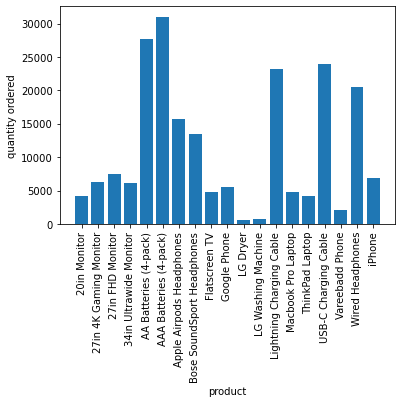

In [115]:
product_group = df.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation="vertical")
plt.ylabel("quantity ordered")
plt.xlabel("product")
plt.show()


#### Plot line on Y axis to show relationship between amount sold and price of product

<ipython-input-116-d3f0d9a2d858>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical")


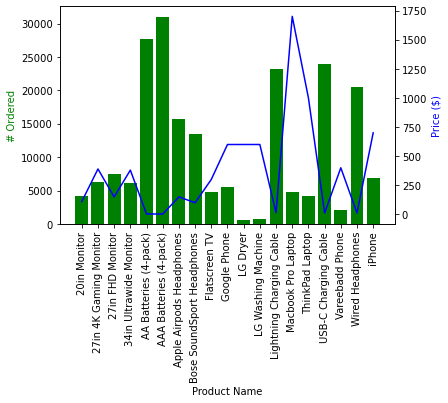

In [116]:
prices = df.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color="g")
ax2.plot(products,prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('# Ordered', color='g')
ax2.set_ylabel('Price ($)',  color='b')
ax1.set_xticklabels(products, rotation="vertical")
plt.show()
